In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-data/loan_data.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/kaggle/input/loan-data/loan_data.csv')
pd.set_option('display.max_columns', 500)
df = data.copy()

Understanding the data

In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Here are what the columns represent:

**credit.policy**: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.


**purpose**: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").


**int.rate**: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.


**installment**: The monthly installments owed by the borrower if the loan is funded.


**log.annual.inc**: The natural log of the self-reported annual income of the borrower.


**dti**: The debt-to-income ratio of the borrower (amount of debt divided by annual income).


fico: The FICO credit score of the borrower.


**days.with.cr.line**: The number of days the borrower has had a credit line.


**revol.bal**: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).


**revol.util**: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).


**inq.last.6mths**: The borrower's number of inquiries by creditors in the last 6 months.


**delinq.2yrs**: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.


**pub.rec**: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
df['purpose'].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

## EDA & Data Visualization

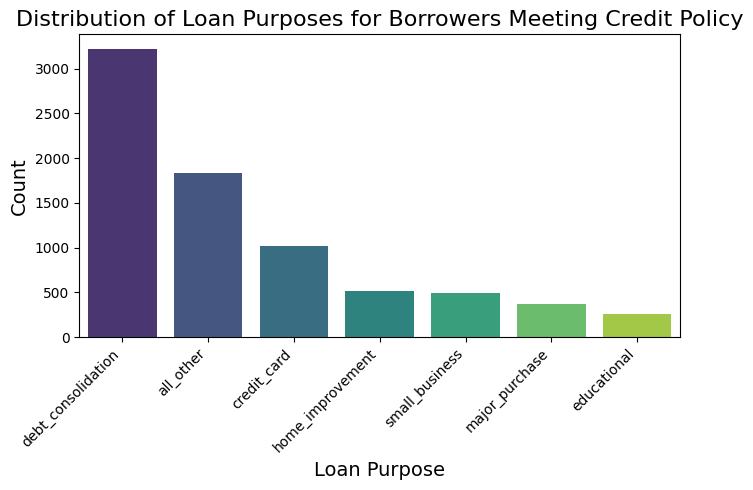

In [8]:
filtered_df = df[df['credit.policy'] == 1]

plt.figure(figsize=(7, 5))

sns.countplot(data=filtered_df, x='purpose', order=filtered_df['purpose'].value_counts().index, palette='viridis')

plt.title('Distribution of Loan Purposes for Borrowers Meeting Credit Policy', fontsize=16)
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


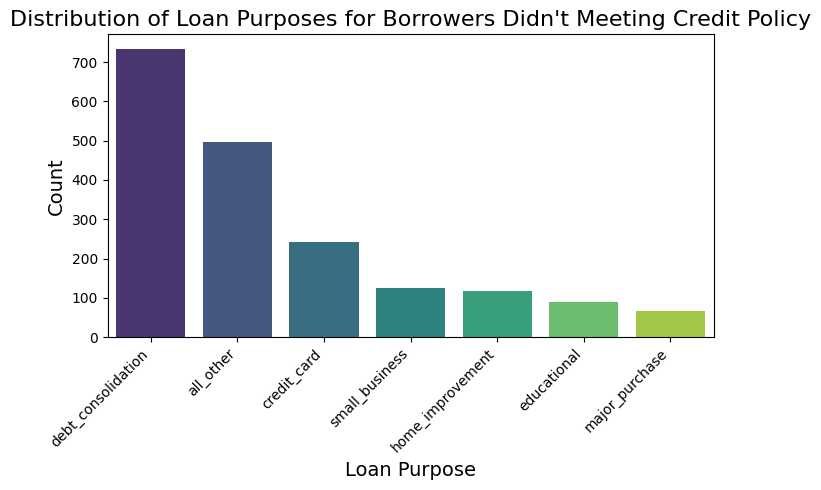

In [9]:
filtered_df = df[df['credit.policy'] == 0]

plt.figure(figsize=(7, 5))

sns.countplot(data=filtered_df, x='purpose', order=filtered_df['purpose'].value_counts().index, palette='viridis')

plt.title("Distribution of Loan Purposes for Borrowers Didn't Meeting Credit Policy", fontsize=16)
plt.xlabel('Loan Purpose', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [10]:
df[df['credit.policy'] == 1]['pub.rec'].value_counts()

pub.rec
0    7303
1     394
2       9
3       3
4       1
Name: count, dtype: int64

In [11]:
df['delinq.2yrs'].value_counts()

delinq.2yrs
0     8458
1      832
2      192
3       65
4       19
5        6
6        2
13       1
7        1
8        1
11       1
Name: count, dtype: int64

In [12]:
df.columns[2:]

Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'fico',
       'days.with.cr.line', 'revol.bal', 'revol.util', 'inq.last.6mths',
       'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

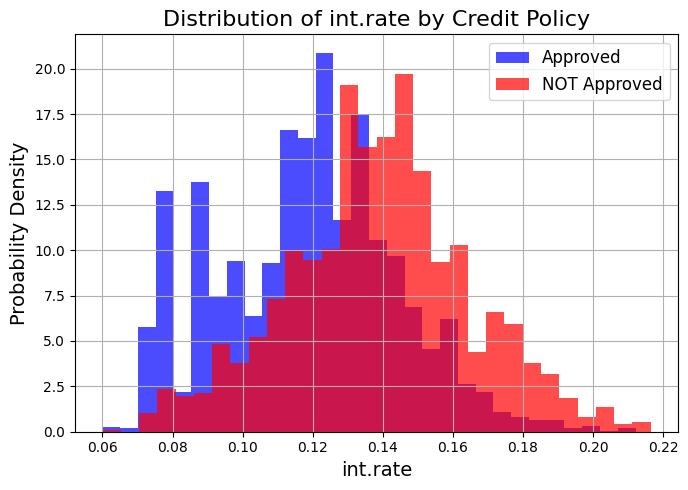

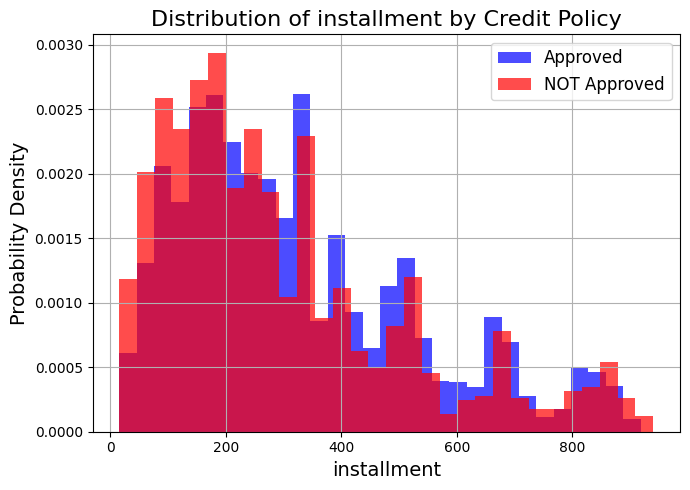

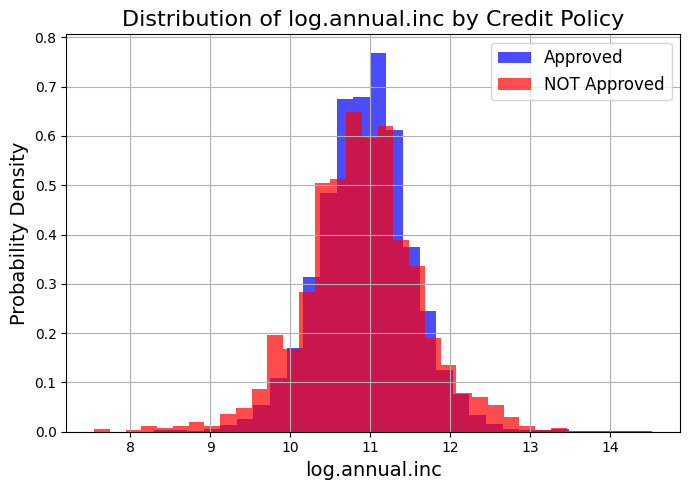

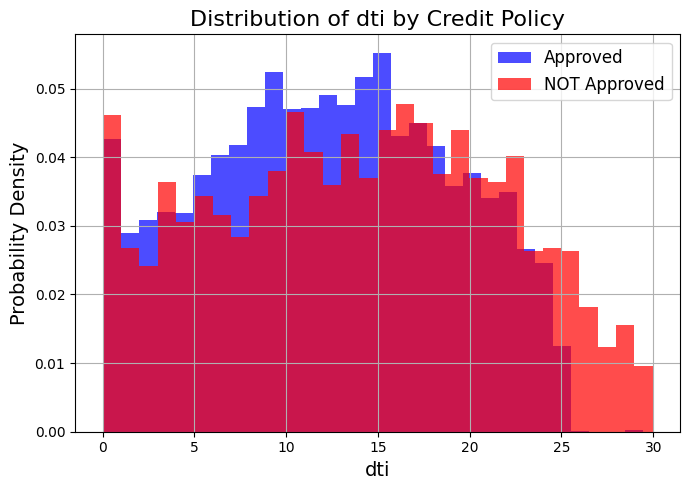

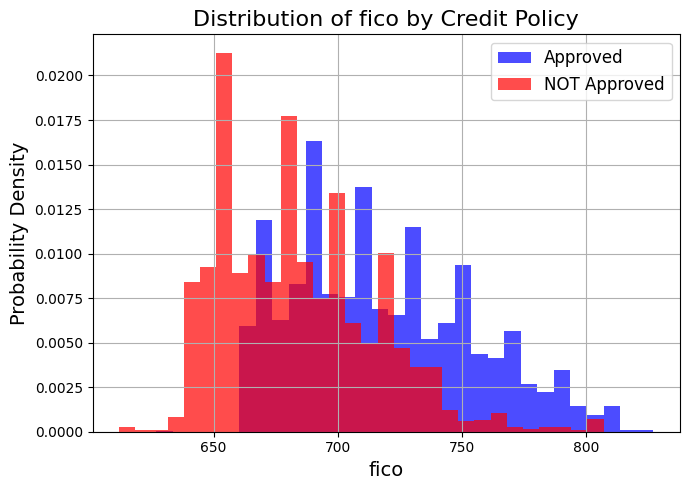

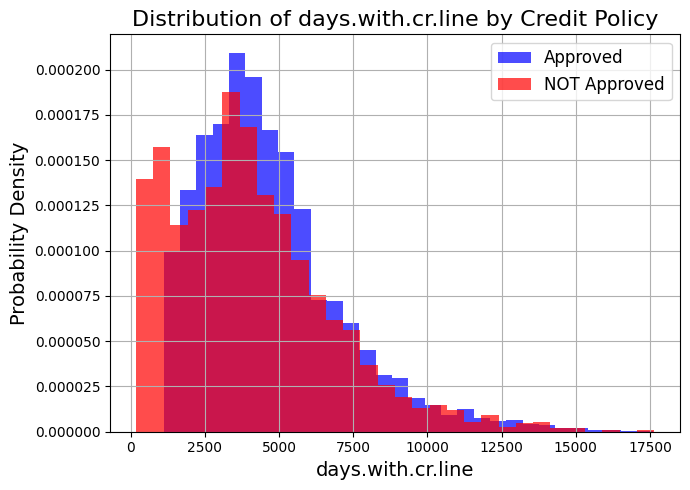

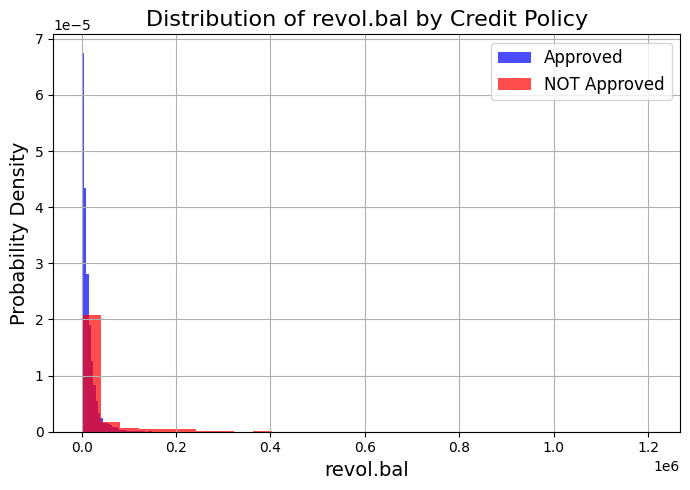

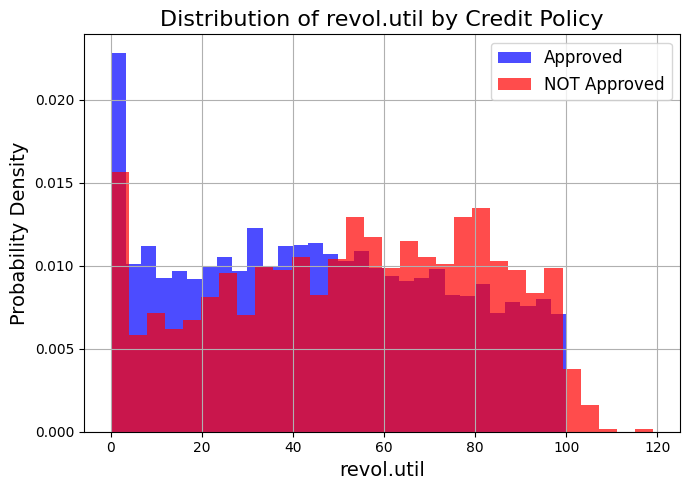

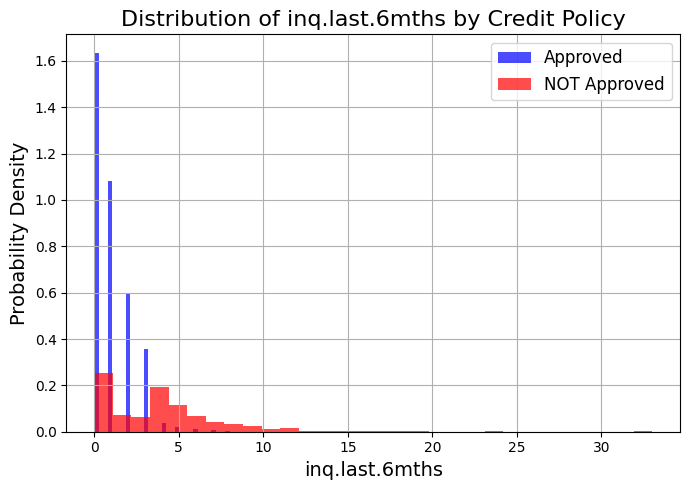

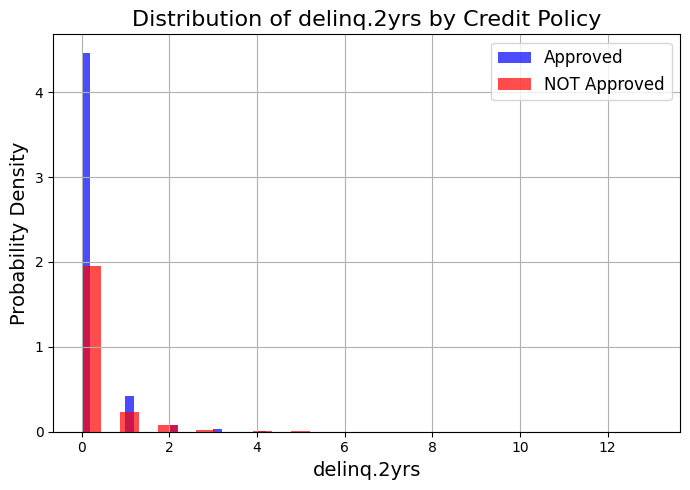

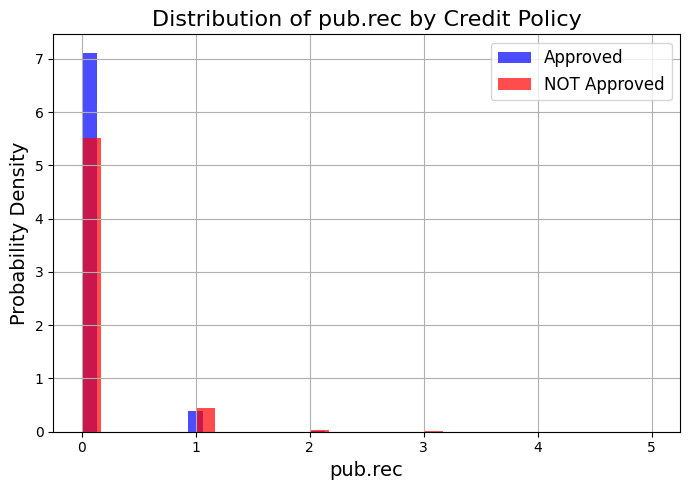

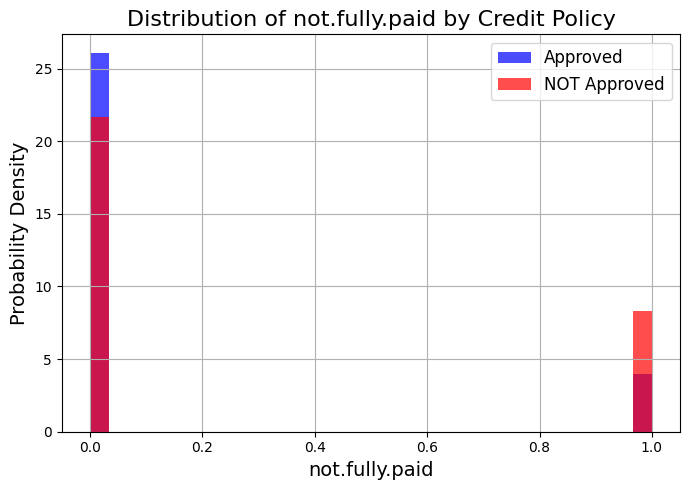

In [13]:
import matplotlib.pyplot as plt

for label in df.columns[2:]:
    plt.figure(figsize=(7, 5))
    plt.hist(df[df["credit.policy"] == 1][label], bins=30, color='blue', alpha=0.7, density=True, label='Approved')
    plt.hist(df[df["credit.policy"] == 0][label], bins=30, color='red', alpha=0.7, density=True, label='NOT Approved')
    plt.title(f'Distribution of {label} by Credit Policy', fontsize=16)
    plt.xlabel(label, fontsize=14)
    plt.ylabel('Probability Density', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.tight_layout()
    plt.show()


In [14]:
df['annual.inc'] = np.exp(df['log.annual.inc'])

In [15]:
def income_cat(x):
    if x <= df['annual.inc'].quantile(0.35):
        return 'lower'
    elif x <= df['annual.inc'].quantile(0.50):
        return 'lower-middle'
    elif x <= df['annual.inc'].quantile(0.75):
        return 'middle'
    elif x <= df['annual.inc'].quantile(0.85):
        return 'upper-middle'
    else:
        return 'high'
    
df['income_cat'] = df['annual.inc'].apply(income_cat)

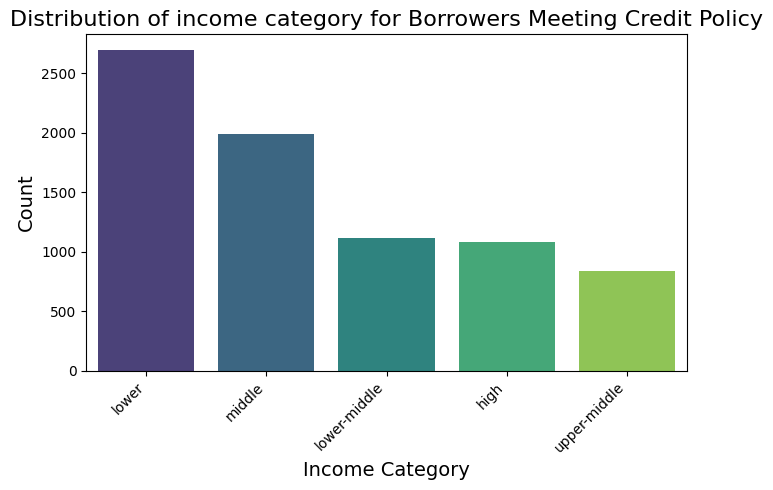

In [16]:
filtered_df = df[df['credit.policy'] == 1]

plt.figure(figsize=(7, 5))

sns.countplot(data=filtered_df, x='income_cat', order=filtered_df['income_cat'].value_counts().index, palette='viridis')

plt.title('Distribution of income category for Borrowers Meeting Credit Policy', fontsize=16)
plt.xlabel('Income Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

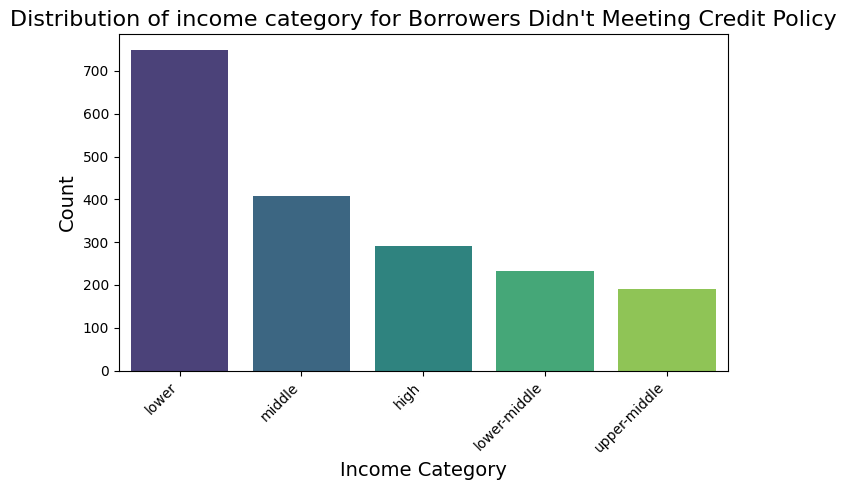

In [17]:
filtered_df = df[df['credit.policy'] == 0]

plt.figure(figsize=(7, 5))

sns.countplot(data=filtered_df, x='income_cat', order=filtered_df['income_cat'].value_counts().index, palette='viridis')

plt.title("Distribution of income category for Borrowers Didn't Meeting Credit Policy", fontsize=16)
plt.xlabel('Income Category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
def credit_score_cat(x):
    if x >= 800:
        return 'Excellent'
    elif x >= 740:
        return 'Very good'
    elif x >= 670:
        return 'Good'
    elif x >= 580:
        return 'Fair'
    else:
        return 'Poor'
df['credit_score_cat'] = df['fico'].apply(credit_score_cat)

In [19]:
df['credit_score_cat'].value_counts()

credit_score_cat
Good         6007
Very good    2085
Fair         1341
Excellent     145
Name: count, dtype: int64

In [20]:
# Convert 'credit.policy' column to boolean type
df['credit.policy'] = df['credit.policy'].astype(bool)

# Convert 'not.fully.paid' column to boolean type
df['not.fully.paid'] = df['not.fully.paid'].astype(bool)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/opt/conda/lib/python3.10/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/cond

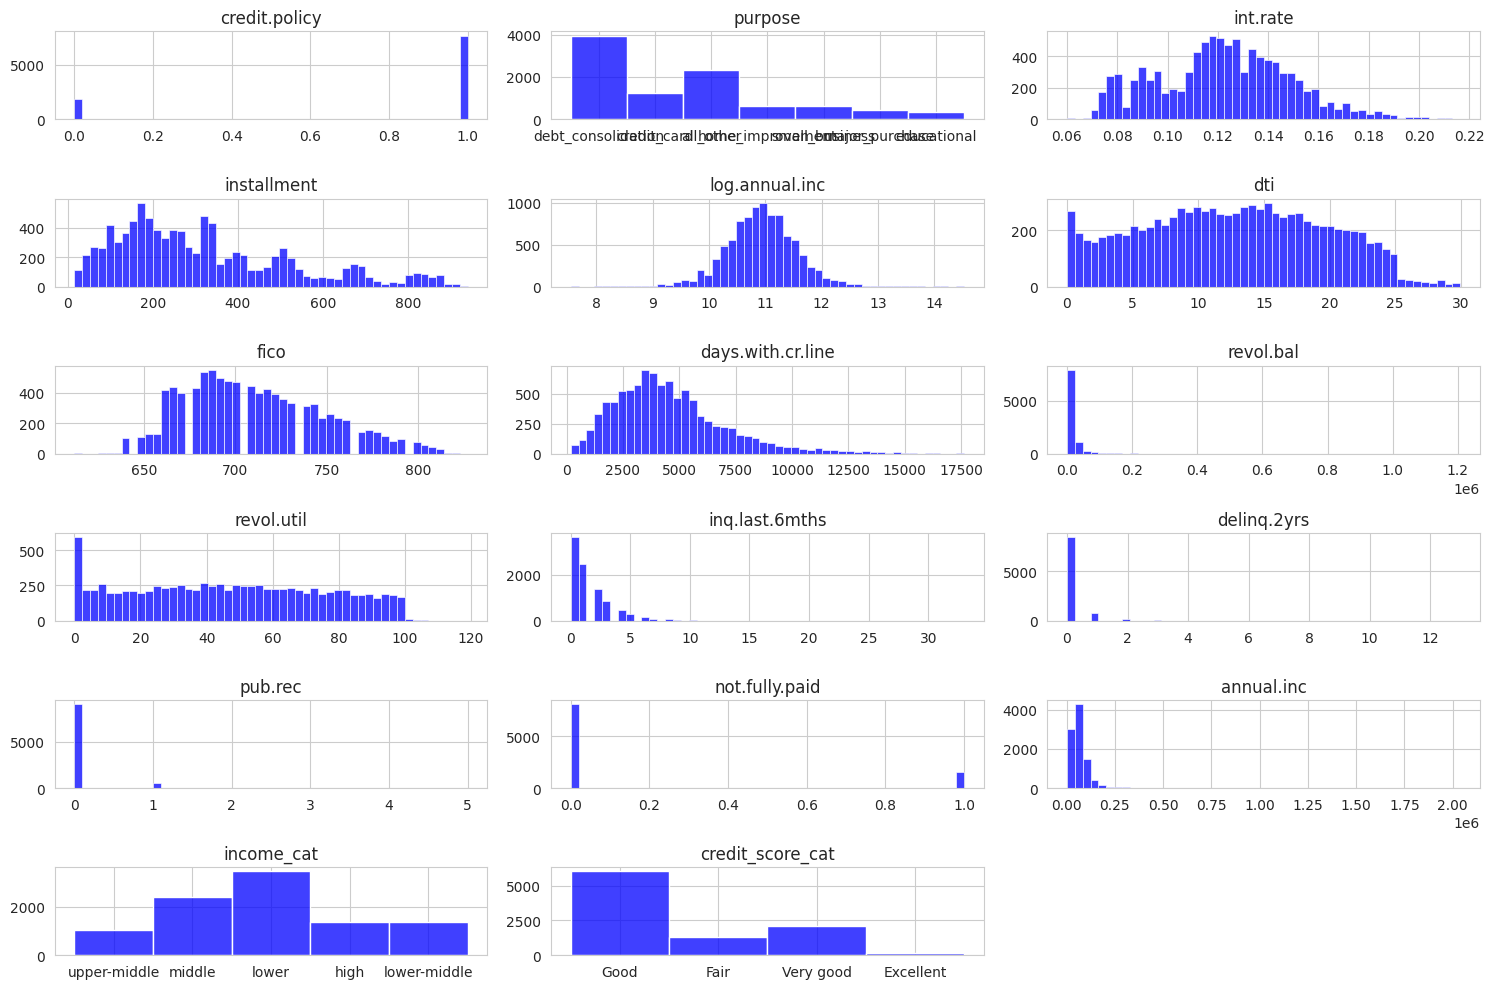

In [21]:
import seaborn as sns
sns.set_style("whitegrid")

# Define the number of columns for subplots
n_cols = 3
n_rows = int(np.ceil(len(df.columns) / n_cols))

# Create a figure and axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop through each column and create a histogram
for i, col in enumerate(df.columns):
    sns.histplot(df[col], bins=50, kde=False, ax=axes[i], color='blue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()
plt.show()

# Checking Correlation

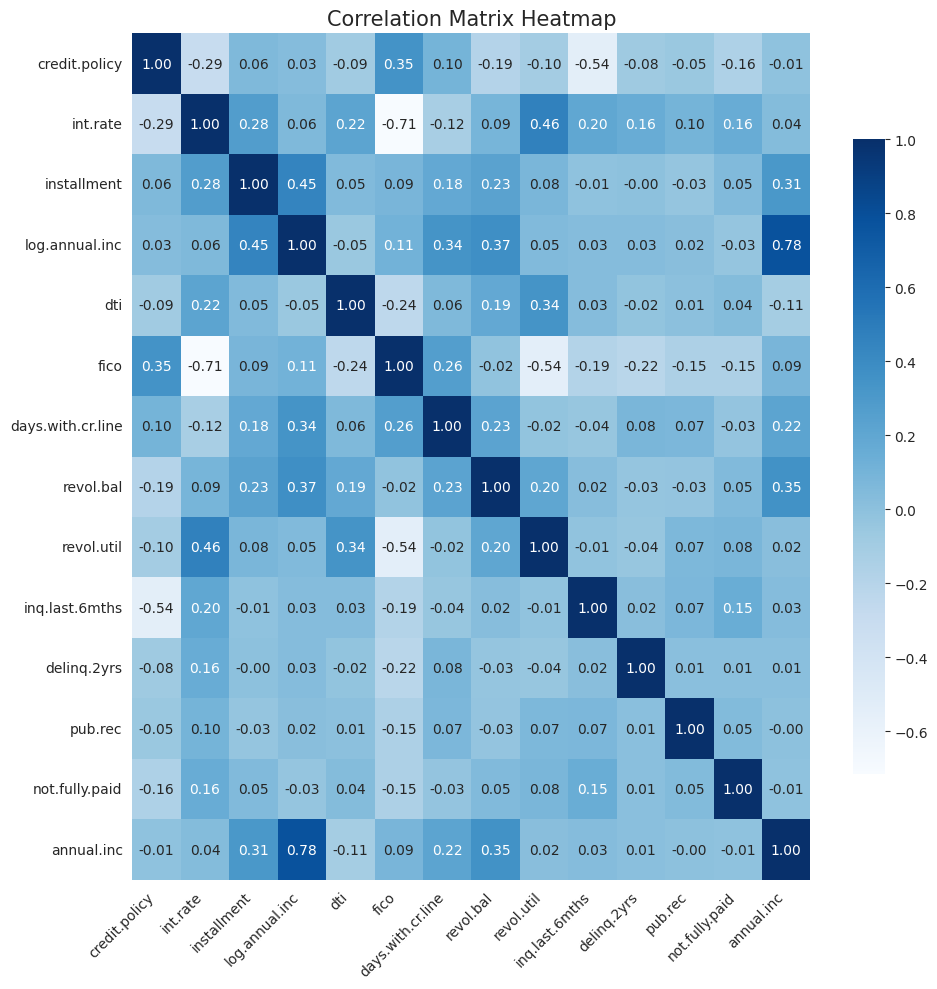

In [22]:
Corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 10))
sns.heatmap(Corr, cmap="Blues", annot=True, fmt=".2f", annot_kws={"size": 10}, cbar_kws={"shrink": 0.75})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.title("Correlation Matrix Heatmap", fontsize=15)
plt.tight_layout()
plt.show()

array([[<Axes: xlabel='log.annual.inc', ylabel='log.annual.inc'>,
        <Axes: xlabel='revol.bal', ylabel='log.annual.inc'>,
        <Axes: xlabel='installment', ylabel='log.annual.inc'>,
        <Axes: xlabel='days.with.cr.line', ylabel='log.annual.inc'>],
       [<Axes: xlabel='log.annual.inc', ylabel='revol.bal'>,
        <Axes: xlabel='revol.bal', ylabel='revol.bal'>,
        <Axes: xlabel='installment', ylabel='revol.bal'>,
        <Axes: xlabel='days.with.cr.line', ylabel='revol.bal'>],
       [<Axes: xlabel='log.annual.inc', ylabel='installment'>,
        <Axes: xlabel='revol.bal', ylabel='installment'>,
        <Axes: xlabel='installment', ylabel='installment'>,
        <Axes: xlabel='days.with.cr.line', ylabel='installment'>],
       [<Axes: xlabel='log.annual.inc', ylabel='days.with.cr.line'>,
        <Axes: xlabel='revol.bal', ylabel='days.with.cr.line'>,
        <Axes: xlabel='installment', ylabel='days.with.cr.line'>,
        <Axes: xlabel='days.with.cr.line', ylabel='da

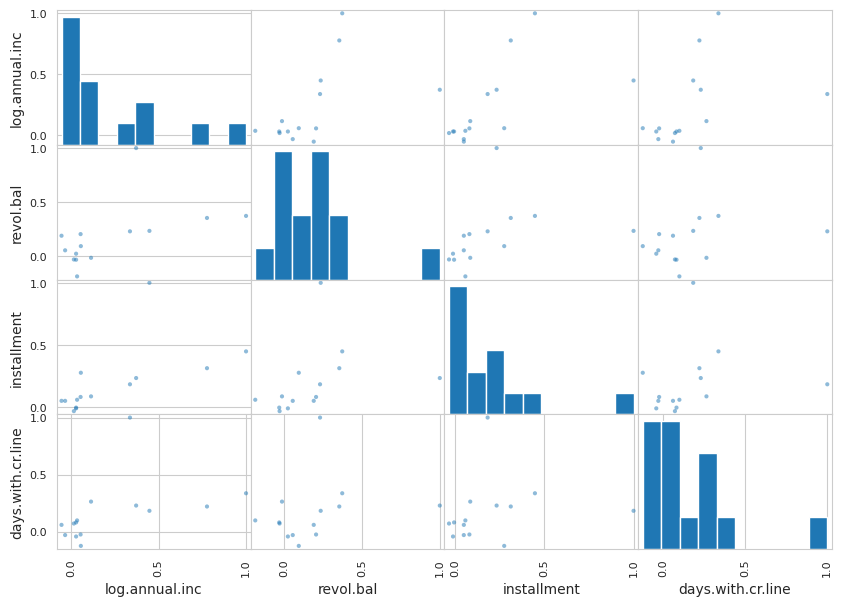

In [23]:
from pandas.plotting import scatter_matrix
scatter_matrix(Corr[['log.annual.inc', 'revol.bal', 'installment', 'days.with.cr.line']], figsize=(10, 7))

# Preprocessing

preparing train and test sets

In [24]:
from sklearn.model_selection import train_test_split
data['income_cat'] = data['log.annual.inc'].apply(income_cat)
train_set, test_set = train_test_split(data, train_size=0.8, stratify = data['income_cat'])

In [25]:
for x in [train_set, test_set]:
    x.drop('income_cat', axis=1, inplace=True)

Customer Transformers, Feature engineering

In [26]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

# Function to compute annual income
def compute_annual_income(df):
    df['annual.inc'] = np.exp(df['log.annual.inc'])
    return df

# Function to categorize income
def categorize_income(df):
    def income_cat(x):
        if x <= df['annual.inc'].quantile(0.35):
            return 'lower'
        elif x <= df['annual.inc'].quantile(0.50):
            return 'lower-middle'
        elif x <= df['annual.inc'].quantile(0.75):
            return 'middle'
        elif x <= df['annual.inc'].quantile(0.85):
            return 'upper-middle'
        else:
            return 'high'
    
    df['income_cat'] = df['annual.inc'].apply(income_cat)
    return df

# Function to categorize credit scores
def categorize_credit_score(df):
    def credit_score_cat(x):
        if x >= 800:
            return 'Excellent'
        elif x >= 740:
            return 'Very good'
        elif x >= 670:
            return 'Good'
        elif x >= 580:
            return 'Fair'
        else:
            return 'Poor'
    
    df['credit_score_cat'] = df['fico'].apply(credit_score_cat)
    return df

# Function to convert columns to boolean
def convert_to_boolean(df):
    df['not.fully.paid'] = df['not.fully.paid'].astype(bool)
    return df

# Transformer classes
class ComputeAnnualIncome(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return compute_annual_income(X.copy())

class CategorizeIncome(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return categorize_income(X.copy())

class CategorizeCreditScore(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return categorize_credit_score(X.copy())

class ConvertToBoolean(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        return convert_to_boolean(X.copy())


numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])


In [27]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

# Custom transformer to select columns by data type
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names]

# Custom transformer to apply preprocessing steps to selected columns
class CustomPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, preprocessors):
        self.preprocessors = preprocessors

    def fit(self, X, y=None):
        for preprocessor in self.preprocessors:
            preprocessor.fit(X)
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for preprocessor in self.preprocessors:
            X_transformed = preprocessor.transform(X_transformed)
        return X_transformed

# Create preprocessors for custom transformations
custom_preprocessors = CustomPreprocessor([
    ComputeAnnualIncome(),
    CategorizeIncome(),
    CategorizeCreditScore(),
    ConvertToBoolean()
])


preprocessed2=ColumnTransformer([
    ('cat', categorical_pipeline, make_column_selector(dtype_include=object)),
    ('num', numerical_pipeline, make_column_selector(dtype_include=np.number))
])



# Creating a pipeline for numerical and categorical columns
full_pipeline = Pipeline([
    ('preprocess_custom', custom_preprocessors),
    ('preprocess_numerical_categorical', preprocessed2)
])


transformed_data = full_pipeline.fit_transform(train_set)

In [28]:
transformed_data.shape

(7662, 29)

In [29]:
pd.DataFrame(transformed_data)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,-2.024303,0.788104,0.204050,0.066918,-1.211261,-1.670597,-1.023227,-0.082473,0.314902,4.676315,-0.293747,-0.234824,-0.167358
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-2.024303,-0.255653,0.059403,-0.348456,1.347395,0.033202,-0.780560,-0.221937,-0.755478,1.081775,-0.293747,-0.234824,-0.385387
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.493997,-0.292930,2.336832,1.323727,-0.317693,1.868061,-0.064745,-0.212112,-0.882822,-0.266177,-0.293747,-0.234824,0.956329
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.493997,0.355691,-0.558441,-1.012099,-1.074683,-0.753167,-1.154661,-0.311591,-0.511115,-0.715495,-0.293747,-0.234824,-0.636959
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-2.024303,0.952123,-1.341167,-3.646339,-1.394333,-1.932719,-1.472094,-0.456784,0.686610,-0.266177,1.530148,-0.234824,-1.039474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.493997,0.486160,0.600241,-0.508825,0.463997,-0.622105,0.092976,0.023622,0.889673,-0.715495,-0.293747,-0.234824,-0.455827
7658,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.493997,0.333324,0.128888,-0.461380,0.286737,-0.359983,-0.683501,-0.239896,1.412817,0.183140,-0.293747,-0.234824,-0.435702
7659,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.493997,0.333324,0.423859,0.476687,0.817066,-0.359983,0.008437,-0.192549,0.593683,-0.266177,-0.293747,-0.234824,0.109371
7660,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.493997,0.486160,-1.048039,0.374712,-1.003488,-1.015290,0.901824,-0.389673,-0.882822,-0.266177,5.177937,-0.234824,0.033899


# Training Model

preparing sets for training

In [30]:
train_X, train_y = train_set.drop('credit.policy', axis=1).copy(), train_set['credit.policy'].copy()
test_X, test_y = test_set.drop('credit.policy', axis=1).copy(), test_set['credit.policy'].copy()

In [31]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = Pipeline([
    ('full_pipeline', full_pipeline),
    ('randomforestclassifier', RandomForestClassifier(random_state=42))
])
rnd_clf.fit(train_X, train_y)

Pipeline(steps=[('full_pipeline',
                 Pipeline(steps=[('preprocess_custom',
                                  CustomPreprocessor(preprocessors=[ComputeAnnualIncome(),
                                                                    CategorizeIncome(),
                                                                    CategorizeCreditScore(),
                                                                    ConvertToBoolean()])),
                                 ('preprocess_numerical_categorical',
                                  ColumnTransformer(transformers=[('cat',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='most_frequent')),
                                                                                   ('encoder',
                                                                                    OneHo...='ignore'))]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7adb02aff5e0>),
                                                                  ('num',
                                                                   Pipeline(steps=[('imputer',
                                                                                    SimpleImputer(strategy='median')),
                                                                                   ('scaler',
                                                                                    StandardScaler())]),
                                                                   <sklearn.compose._column_transformer.make_column_selector object at 0x7adb02afd330>)]))])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=42))])

In [32]:
from sklearn.model_selection import cross_val_score
cross_val_score(rnd_clf, train_X, train_y, cv=3)

array([0.98707909, 0.98512138, 0.98786218])

Testing Model

In [33]:
from sklearn.metrics import classification_report
pred = rnd_clf.predict(test_X)
print(classification_report(test_y, pred)) #99 accuracy!

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       365
           1       0.99      1.00      1.00      1551

    accuracy                           0.99      1916
   macro avg       0.99      0.98      0.99      1916
weighted avg       0.99      0.99      0.99      1916

